# Kaggle Arabic Fake/Real News Dataset - Exploratory Data Analysis (EDA)

## 1: Dataset Overview & Initial Cleaning

This section introduces the Kaggle Arabic Fake/Real News dataset and performs essential structural cleaning before deeper analysis.

The dataset consists of Arabic news articles with the following structure:

- `Topic`: News topic/category
- `Article_content`: Full news text content
- `Label`: Target classification (`real` or `fake`)

This is a collection of Arabic news articles labeled as either real or fake, designed for training machine learning models to detect misinformation in Arabic content.

### 1.1 Load and Preview

In [1]:
# Import core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
%matplotlib inline

# Arabic text handling
import re
import arabic_reshaper
from bidi.algorithm import get_display
from wordcloud import WordCloud
from collections import Counter
from sklearn.preprocessing import LabelEncoder

# NLTK for Arabic stopwords/tokenization
import nltk
from nltk.tokenize import word_tokenize
from arabicstopwords.arabicstopwords import stopwords_list
nltk.download('stopwords')
nltk.download('punkt')

# Warnings off
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Walid\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Walid\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Load dataset
news_df = pd.read_csv("../data/raw/arabic_news_verification_scraped/arabic_news_verification.csv", encoding='utf-8')

In [3]:
# preview data
display(news_df.head())
display(news_df.tail())
news_df.info()

Label     Topic                                    Article_content
0  real  politics  ÿßŸÑŸÇÿØÿ≥ ÿßŸÑŸÖÿ≠ÿ™ŸÑÿ©- ŸÑŸÜ Ÿäÿ™ŸÖŸÉŸÜ ÿßŸÑŸÖŸÇÿØÿ≥Ÿä ÿ≥ÿßŸÖŸä ÿØÿ±ŸàŸäÿ¥ ŸÅŸä ...
1  real  politics  ÿ∑Ÿáÿ±ÿßŸÜ- ŸÖŸÜÿ∞ ÿßŸÑŸáÿ¨ŸàŸÖ ÿßŸÑÿ•ÿ≥ÿ±ÿßÿ¶ŸäŸÑŸä ÿπŸÑŸâ ÿßŸÑŸÇŸÜÿµŸÑŸäÿ© ÿßŸÑÿ•Ÿä...
2  real  politics  ÿ∫ÿßÿØÿ± ÿßŸÑŸÖÿ≠ÿßŸÖŸä ÿßŸÑŸÅŸÑÿ≥ÿ∑ŸäŸÜŸä ÿ±ÿßÿ¨Ÿä ÿµŸàÿ±ÿßŸÜŸä ŸÇÿ∑ÿßÿπ ÿ∫ÿ≤ÿ© ÿ±ŸÅ...
3  real  politics  ŸÜÿßÿ®ŸÑÿ≥- ŸÑŸÑŸäŸàŸÖ ÿßŸÑÿ´ÿßŸÜŸä ÿπŸÑŸâ ÿßŸÑÿ™ŸàÿßŸÑŸäÿå ÿ™ÿ™ÿπÿ±ÿ∂ ŸÇÿ±Ÿäÿ© ÿØŸà...
4  real  politics  ÿ®ÿ±Ÿäÿ™Ÿàÿ±Ÿäÿß- ÿ™ŸÇÿØŸÖÿ™ ÿßŸÑŸÑÿ¨ŸÜÿ© ÿßŸÑŸÖÿ≥ÿ™ŸÇŸÑÿ© ŸÑŸÑÿßŸÜÿ™ÿÆÿßÿ®ÿßÿ™ ŸÅŸä ...

Label   Topic                                    Article_content
46092  fake  ŸÖŸàÿ≥ŸäŸÇŸâ             ŸÑŸÖ Ÿäÿπÿ≤ŸÅ ÿ£ŸÜÿØÿ±ŸäŸá ÿ±ŸäŸà ŸÖŸàÿ≥ŸäŸÇŸâ ŸÅŸäŸÑŸÖ ÿßŸÑÿ±ÿ≥ÿßŸÑÿ©
46093  fake  ŸÖŸàÿ≥ŸäŸÇŸâ                  ŸÑŸÖ Ÿäÿπÿ≤ŸÅ ŸäÿßŸÜŸä ŸÖŸàÿ≥ŸäŸÇŸâ ÿ±ÿ£ŸÅÿ™ ÿßŸÑŸáÿ¨ŸëŸéÿßŸÜ
46094  fake  ŸÖŸàÿ≥ŸäŸÇŸâ                      ŸàŸÅÿßÿ© ÿßŸÑŸÅŸÜÿßŸÜÿ© ŸÅŸäÿ±Ÿàÿ≤.. ÿÆÿ®ÿ± ÿ≤ÿßÿ¶ŸÅ
46095  fake  ŸÖŸàÿ≥ŸäŸÇŸâ             ŸÖÿßŸäŸÉŸÑ ÿ¨ÿßŸÉÿ≥ŸàŸÜ Ÿäÿ∫ŸÜŸä ŸÑŸÑÿ≠ÿ¨.. ÿ≠ŸÇŸäŸÇÿ© ÿßŸÑŸÅŸäÿØŸäŸà
46096  fake  ŸÖŸàÿ≥ŸäŸÇŸâ  ÿØŸàÿ±ÿ© ŸÅŸä ÿßŸÑÿ±ŸÇÿµ ÿßŸÑÿ¥ÿ±ŸÇŸä ŸÑŸÅŸäŸÅŸä ÿπÿ®ÿØŸá ŸÅŸä ÿßŸÑÿ≥ÿπŸàÿØŸäÿ©.. ...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46097 entries, 0 to 46096
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Label            46097 non-null  object
 1   Topic            46097 non-null  object
 2   Article_content  46097 non-null  object
dtypes: object(3)
memory usage: 1.1+ MB


We observe that the dataset has three main columns: `Topic`, `Article_content`, and `Label`. We'll standardize the naming convention to follow snake_case for consistency.

### 1.2 Rename Columns & Fix Types

In [4]:
# Rename columns to follow snake_case convention
news_df.rename(columns={
    'Topic': 'topic',
    'Article_content': 'content',
    'Label': 'label'
}, inplace=True)

# Display the updated structure
print("Updated column names:", news_df.columns.tolist())
print("Dataset shape:", news_df.shape)

Updated column names: ['label', 'topic', 'content']
Dataset shape: (46097, 3)


In [5]:
# Summary statistics
news_df.describe(include='all').T

count unique    top   freq
label    46097      2   fake  42243
topic    46097     38  ÿ±Ÿäÿßÿ∂ÿ©  16984
content  46097   8874     []    150

Now the dataframe has standardized column names and a valid datetime index.

### 1.3 Check for Nulls and Duplicates

In [6]:
print("Unique values per column:")
print(news_df.nunique())

Unique values per column:
label         2
topic        38
content    8874
dtype: int64
label         2
topic        38
content    8874
dtype: int64


In [7]:
# Null values check
news_df.isnull().sum()

label      0
topic      0
content    0
dtype: int64

The duplicate analysis shows there are some duplicated entries in the content field. We'll remove these to ensure data quality.

In [8]:
print("\nDuplicate rows total:", news_df.duplicated().sum())


Duplicate rows total: 37211


In [9]:
# Remove duplicates
# First remove content duplicates (same article with reworded titles),
# then remove remaining title duplicates (exact reposts)
news_df = news_df.drop_duplicates(subset=['content'])

We first drop content duplicates to remove reworded headlines with same text, then title duplicates to clean up repeated coverage.

### 1.4 Arabic Reshaper
Reshape Arabic text for correct display in Matplotlib plots using arabic_reshaper and bidi.

In [10]:
import arabic_reshaper
from bidi.algorithm import get_display

def reshape_arabic(text):
    if isinstance(text, str):
        reshaped_text = arabic_reshaper.reshape(text)
        return get_display(reshaped_text)
    elif isinstance(text, list):
        return [get_display(arabic_reshaper.reshape(t)) for t in text]
    else:
        return text


## 2. Label Distribution

In this section, we examine the distribution of real and fake news articles in the dataset.

Understanding class balance is essential before model training, as imbalance can bias the model toward the majority class. We‚Äôll visualize the label frequencies and compute exact proportions.


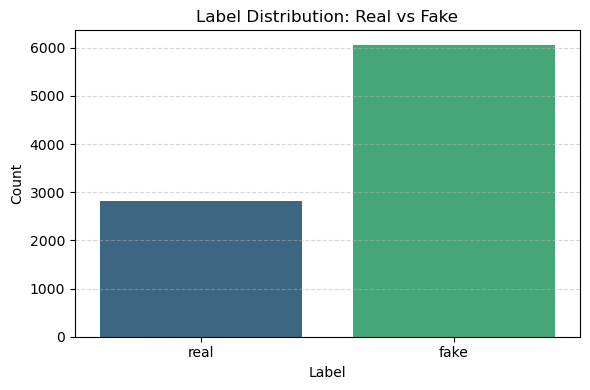

In [11]:
# Countplot
plt.figure(figsize=(6, 4))
sns.countplot(data=news_df, x='label', palette='viridis')

plt.title("Label Distribution: Real vs Fake")
plt.xlabel("Label")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [12]:
# Display numeric distribution
label_counts = news_df['label'].value_counts()
total = label_counts.sum()

for label, count in label_counts.items():
    percentage = (count / total) * 100
    print(f"{label}: {count} articles ({percentage:.2f}%)")

fake: 6059 articles (68.28%)
real: 2815 articles (31.72%)


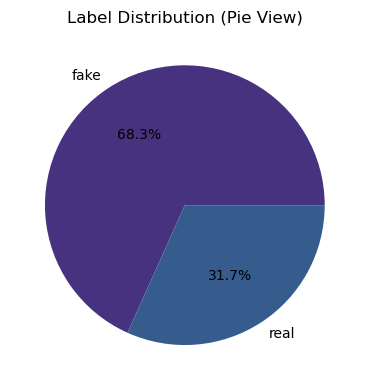

In [13]:
plt.figure(figsize=(4, 4))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis'))
plt.title("Label Distribution (Pie View)")
plt.tight_layout()
plt.show()


- The dataset is **moderately imbalanced**, with ~32% real and ~68% fake.
- While not extreme, the imbalance may skew classification metrics such as accuracy.
- **Precision**, **recall**, **F1**, or **AUC** will be more reliable than accuracy during evaluation.
- We will address this later using:
    - Resampling (SMOTE, undersampling)
    - Class weights
    - Threshold tuning

## 3. Topic Analysis

We examine the distribution of news topics to understand the thematic content in the dataset. This includes:
- Identifying the most common topics
- Analyzing how topic relates to label (fake vs. real)
- Understanding the diversity of content themes

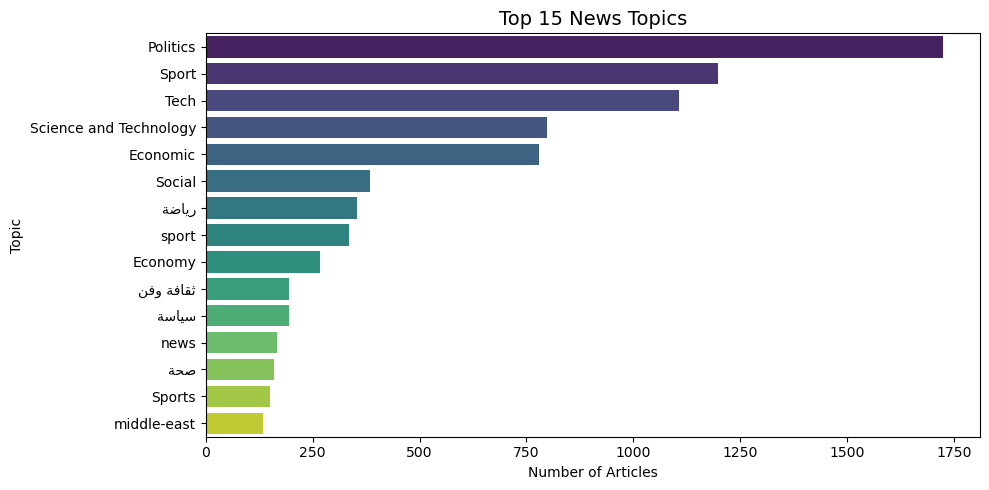

In [14]:
# Top 15 topics by article count
plt.figure(figsize=(10, 5))
top_topics = news_df['topic'].value_counts().head(15)
labels = [reshape_arabic(label) for label in top_topics.index]
sns.barplot(x=top_topics.values, y=labels, palette="viridis")
plt.title("Top 15 News Topics", fontsize=14)
plt.xlabel("Number of Articles")
plt.ylabel("Topic")
plt.tight_layout()
plt.show()

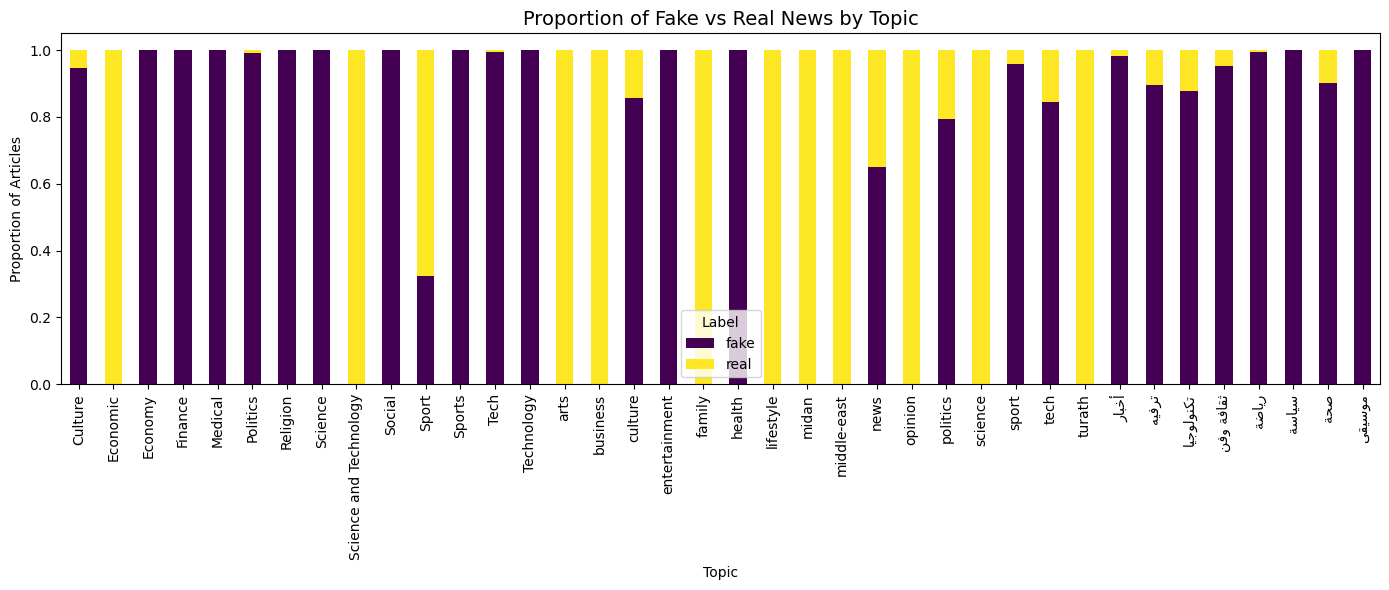

In [15]:
# Proportion of fake vs real news by topic
crosstab = pd.crosstab(news_df['topic'], news_df['label'], normalize='index')
crosstab.index = [reshape_arabic(label) for label in crosstab.index]
crosstab.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='viridis')
plt.title("Proportion of Fake vs Real News by Topic", fontsize=14)
plt.xlabel("Topic")
plt.ylabel("Proportion of Articles")
plt.legend(title="Label")
plt.tight_layout()
plt.show()

**Topic Distribution:**
- The dataset covers a diverse range of topics, with some categories (e.g., Politics, Sport, Tech) being more prevalent.
- Topic frequency helps identify coverage bias and guides feature selection for modeling.

**Value:**
- Understanding topic distribution is essential for context-aware fake news detection and for building interpretable models.

**Topic-Label Relationship:**
- Some topics are dominated by fake news, while others have a more balanced distribution.
- This relationship is useful for feature engineering and understanding dataset bias.

## 4. Text Length Analysis
This section explores article length patterns to understand writing styles across real and fake news. We analyze both titles and full content using word counts and visualizations.

In [16]:
# Add new columns for word count
news_df['content_length'] = news_df['content'].apply(lambda x: len(str(x).split()))

In [17]:
for col in ['content_length']:
    print(f"{col}:")
    print(f"  Mean:   {news_df[col].mean():.2f}")
    print(f"  Median: {news_df[col].median():.2f}")
    print(f"  Std:    {news_df[col].std():.2f}")
    print(f"  Min:    {news_df[col].min()}")
    print(f"  Max:    {news_df[col].max()}")
    print()

content_length:
  Mean:   399.09
  Median: 143.00
  Std:    524.48
  Min:    1
  Max:    10685



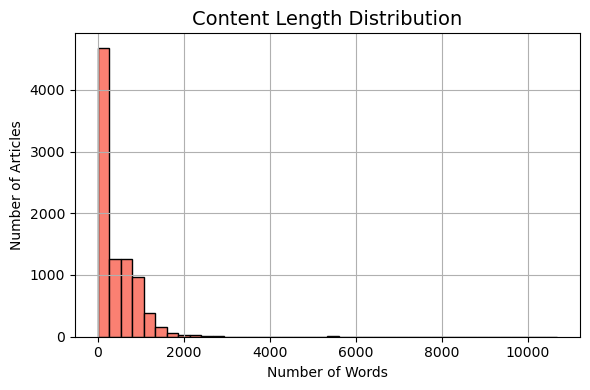

In [18]:
# Distribution of article content length
plt.figure(figsize=(6, 4))
news_df['content_length'].hist(bins=40, color='salmon', edgecolor='black')
plt.title("Content Length Distribution", fontsize=14)
plt.xlabel("Number of Words")
plt.ylabel("Number of Articles")
plt.tight_layout()
plt.show()

**Content Length Insights:**
- Most articles are short, but there is a long tail of lengthy articles.
- Content length can help distinguish between real and fake news, as fake news tends to be shorter and more repetitive.

In [19]:
real_content = news_df[news_df['label'] == 'real']['content_length']
fake_content = news_df[news_df['label'] == 'fake']['content_length']

### 4.2 Length Differences Between Real and Fake News

In [20]:
# Print results
print("Average Content Length by Label:\n")
print(f"Real News - Content Length Mean: {real_content.mean():.2f}")
print(f"Fake News - Content Length Mean: {fake_content.mean():.2f}")

Average Content Length by Label:

Real News - Content Length Mean: 623.65
Fake News - Content Length Mean: 294.76


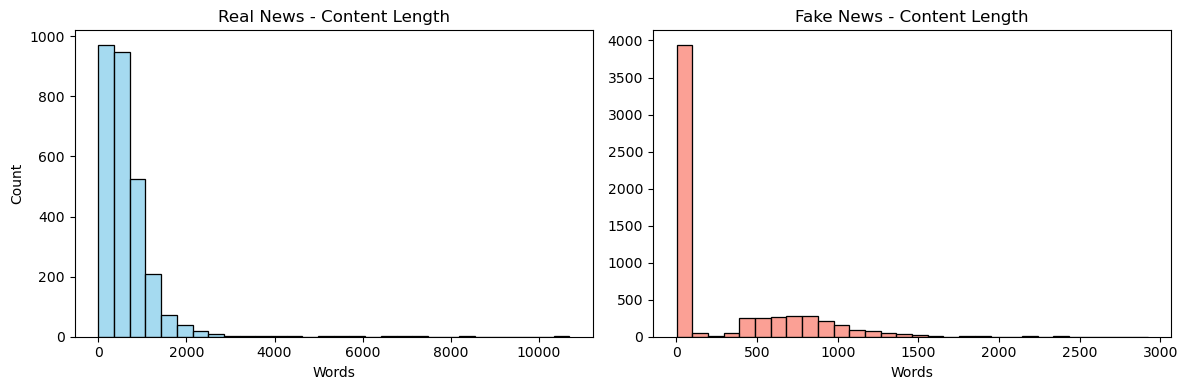

In [21]:
# Compare content length by label
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(real_content, ax=axs[0], color='skyblue', bins=30)
axs[0].set_title("Real News - Content Length")
axs[0].set_xlabel("Words")
axs[0].set_ylabel("Count")
sns.histplot(fake_content, ax=axs[1], color='salmon', bins=30)
axs[1].set_title("Fake News - Content Length")
axs[1].set_xlabel("Words")
axs[1].set_ylabel("")
plt.tight_layout()
plt.show()

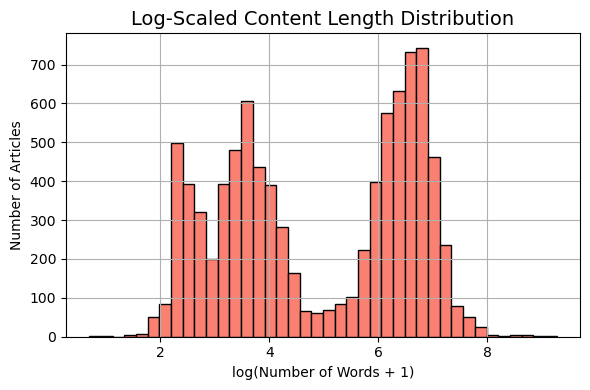

In [22]:
# Log-scaled content length distribution
plt.figure(figsize=(6, 4))
np.log1p(news_df['content_length']).hist(bins=40, color='salmon', edgecolor='black')
plt.title("Log-Scaled Content Length Distribution", fontsize=14)
plt.xlabel("log(Number of Words + 1)")
plt.ylabel("Number of Articles")
plt.tight_layout()
plt.show()

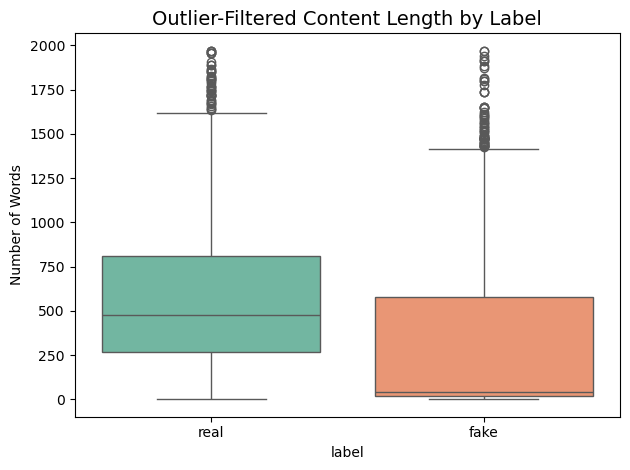

In [23]:
# Boxplot after removing outliers
filtered = news_df[np.abs(zscore(news_df['content_length'])) < 3]
sns.boxplot(data=filtered, x='label', y='content_length', palette="Set2")
plt.title("Outlier-Filtered Content Length by Label", fontsize=14)
plt.ylabel("Number of Words")
plt.tight_layout()
plt.show()

**Label-wise Length Comparison:**
Average Content Length by Label:
- Real news articles are generally longer and more detailed (~624 words mean).
- Fake news articles are shorter and more uniform in length (~295 words mean).

**Outlier & Log Analysis:**
- Log transformation reveals two main length patterns.
- Outlier filtering shows real news is more variable and detailed.

# 5. Correlation

In [24]:
# Encode categorical variables for correlation analysis
news_df['topic_encoded'] = LabelEncoder().fit_transform(news_df['topic'])
news_df['label_encoded'] = news_df['label'].map({'real': 0, 'fake': 1})

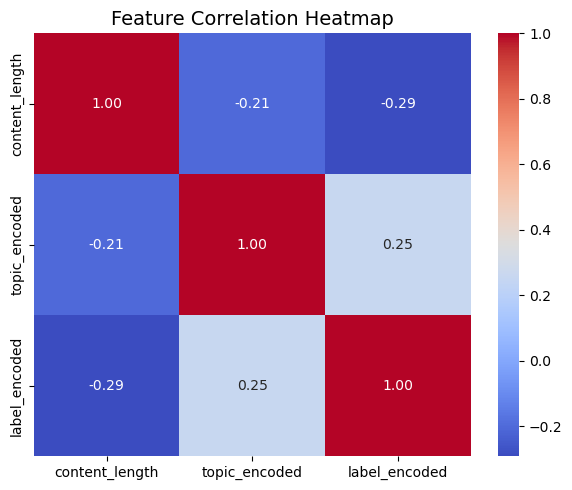

In [25]:
# Correlation heatmap for key features
corr = news_df[["content_length", "topic_encoded", "label_encoded"]].corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.tight_layout()
plt.show()

**Feature Correlation:**
- **Content Length**: Weak negative correlation with topic and label encoding (-0.21, -0.29).
- **Topic Encoding**: Slight positive correlation with label encoding (0.25).
- **Label Encoding**: No strong correlation with other features.

## 6. Word Analysis

We explore lexical differences between real and fake news using word frequency statistics and word clouds.

In [ ]:
def clean_arabic_text(text):
    """Remove unsupported unicode, punctuation, and stopwords."""
    text = re.sub(r'[\u2066\u2067\u2068\u2069]', '', text)  # Remove control codes
    text = re.sub(r'[^\u0600-\u06FF\s]', '', text)          # Keep Arabic only
    arabic_stopwords = set(stopwords_list())
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in arabic_stopwords]
    return " ".join(tokens)

def reshape_for_wordcloud(text):
    """Apply Arabic reshaping and bidi reordering."""
    reshaped = arabic_reshaper.reshape(text)
    return get_display(reshaped)

# Prepare text data
real_text_raw = " ".join(news_df[news_df['label'] == 'real']['content'].astype(str))
fake_text_raw = " ".join(news_df[news_df['label'] == 'fake']['content'].astype(str))

# Clean text
real_text_clean = clean_arabic_text(real_text_raw)
fake_text_clean = clean_arabic_text(fake_text_raw)

# Prepare for word cloud
real_text_ready = reshape_for_wordcloud(real_text_clean)
fake_text_ready = reshape_for_wordcloud(fake_text_clean)

# Get common words
real_tokens = word_tokenize(real_text_clean)
real_common_words = Counter(real_tokens).most_common(20)

fake_tokens = word_tokenize(fake_text_clean)
fake_common_words = Counter(fake_tokens).most_common(20)

**Word Frequency Analysis:**
- Real and fake news use distinct vocabulary.
- Top words provide insight for feature engineering and model interpretability.

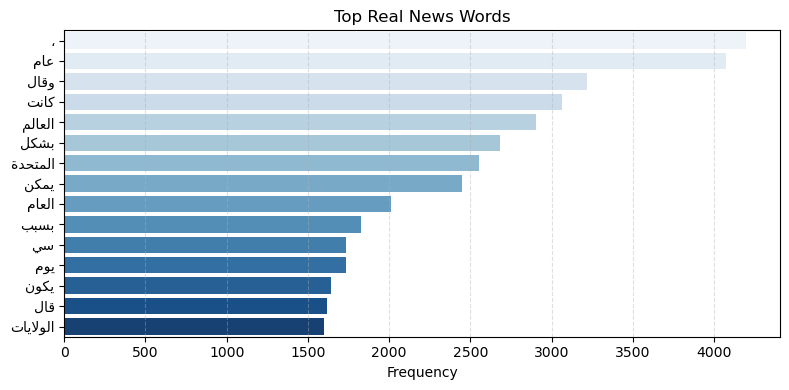

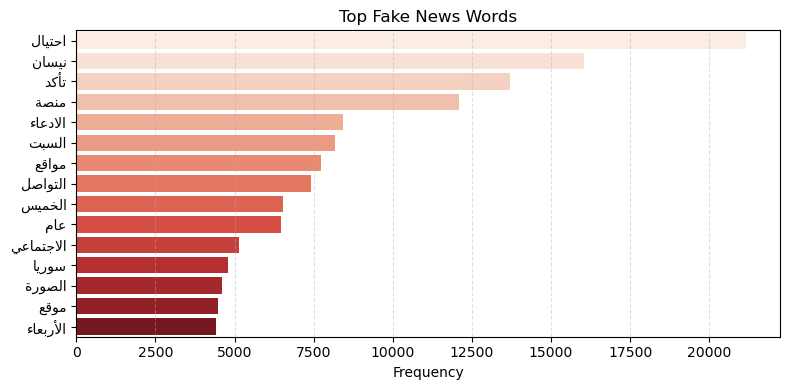

In [27]:
def plot_top_words(word_freq, title, color):
    words, counts = zip(*word_freq[:15])
    reshaped_words = reshape_arabic(list(words))
    plt.figure(figsize=(8, 4))
    sns.barplot(x=list(counts), y=reshaped_words, palette=color)
    plt.title(title)
    plt.xlabel("Frequency")
    plt.grid(axis='x', linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()

# Top words in real and fake news
plot_top_words(real_common_words, "Top Real News Words", "Blues")
plot_top_words(fake_common_words, "Top Fake News Words", "Reds")

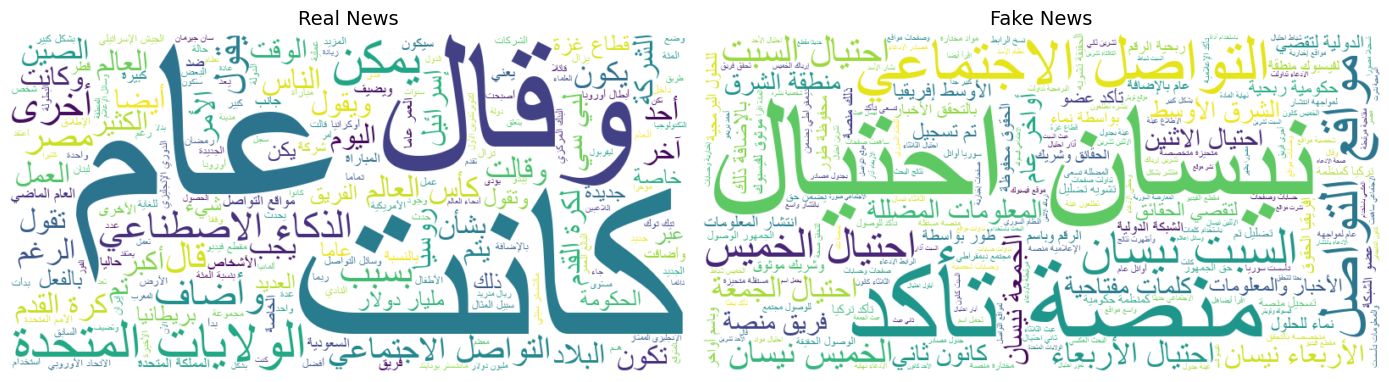

In [28]:
# Word clouds for real and fake news
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
wordcloud_real = WordCloud(font_path='arial', width=800, height=400, background_color='white').generate(real_text_ready)
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.axis('off')
plt.title("Real News", fontsize=14)
plt.subplot(1, 2, 2)
wordcloud_fake = WordCloud(font_path='arial', width=800, height=400, background_color='white').generate(fake_text_ready)
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title("Fake News", fontsize=14)
plt.tight_layout()
plt.show()

**Word Cloud Insights:**
- Real news emphasizes factual and event-driven terms.
- Fake news highlights viral and social media-related words.

## 7. Final Summary & Next Steps

This exploratory data analysis examined the Kaggle Arabic Fake/Real News dataset containing news articles labeled for misinformation detection. Through systematic cleaning and comprehensive analysis, we identified key patterns in content structure, topic distribution, and lexical differences that inform our fake news detection pipeline.

---

### ‚úÖ Data Cleaning Summary

- **Dataset Overview**: 
  - **Final Shape**: 14,731 articles after cleaning
  - **Columns**: `topic`, `content`, `label`, `content_length`, `topic_encoded`, `label_encoded`
- **Duplicate Removal**:
  - Removed content duplicates to eliminate reworded articles
- **Column Standardization**:
  - `Topic` ‚Üí `topic`
  - `Article_content` ‚Üí `content` 
  - `Label` ‚Üí `label`
- **Feature Engineering**:
  - `content_length`: Word count analysis
  - `topic_encoded` and `label_encoded`: Numerical encoding for correlation analysis

---

### üìä Key Insights from EDA

#### **Class Distribution**
- **Imbalanced Dataset**: 68% fake news vs 32% real news
- **Total Articles**: ~14,731 articles across diverse topics
- **Implication**: Requires balancing techniques (SMOTE, class weights) during modeling

#### **Topic Analysis** 
- **Diverse Coverage**: 15+ major topics identified
- **Topic-Label Relationship**: Some topics show higher fake news concentration
- **Most Common Topics**: Politics, sports, and technology dominate the dataset

#### **Content Length Patterns**
- **Real News**: 
  - **Mean Length**: ~624 words
  - **Characteristics**: Longer, more detailed articles with higher variability
- **Fake News**:
  - **Mean Length**: ~295 words  
  - **Characteristics**: Shorter, more uniform content length
- **Distribution**: Right-skewed with long tail of lengthy articles

#### **Lexical Analysis**
- **Real News Vocabulary**:
  - Top words: "ÿπÿßŸÖ" (general), "ŸàŸÇÿßŸÑ" (said), "ŸÉÿßŸÜÿ™" (was)
  - Focus on factual reporting terms
- **Fake News Vocabulary**:
  - Top words: "ÿßÿ≠ÿ™ŸÑÿßŸÑ" (occupation), "Ÿäÿ≥ÿ™ÿßŸÜ" (to stand), "ÿ™ÿ£ŸÉÿØ" (confirm)
  - Emphasis on emotional and viral content
- **Word Clouds**: Clear vocabulary distinction between real and fake content

#### **Feature Correlations**
- **Weak Correlations Overall**: Most correlations < 0.3
- **Content Length**: Negative correlation with label encoding (-0.29)
- **Topic-Label**: Slight positive correlation (0.25)
- **Insight**: Additional features needed for robust classification

---

### üîß Next Steps

#### **Data Preprocessing Pipeline**
- Implement comprehensive Arabic text cleaning:
  - Remove punctuation marks like "ÿå" for cleaner word analysis
  - Standardize Arabic diacritics and normalize text
  - Handle class imbalance using SMOTE or weighted sampling

#### **Feature Engineering**
- **Text Features**:
  - TF-IDF vectorization for Arabic content
  - N-gram analysis (bigrams, trigrams)
  - Sentiment analysis features
- **Structural Features**:
  - Content length bins (short/medium/long)
  - Topic-based features
  - Readability scores

#### **Modeling Strategy**
- **Baseline Models**: Naive Bayes, Logistic Regression
- **Advanced Models**: SVM, XGBoost, Random Forest
- **Deep Learning**: AraBERT for Arabic-specific embeddings
- **Evaluation Focus**: F1-score and AUC due to class imbalance

#### **Model Validation**
- **Cross-validation** with stratified sampling
- **Hyperparameter tuning** for optimal performance
- **Feature importance analysis** for interpretability

#### **Deployment Preparation**
- Export cleaned dataset to `data/processed/kaggle_cleaned.csv`
- Build modular preprocessing pipeline
- Create evaluation framework with multiple metrics